## **SBU Food Explorartory Data Analysis**

**Goal:** To conduct a data-driven analysis of SBU's campus dining options, identifying food choices that support a balanced, healthy diet.<br>
<br>**Questions:** 
1. Which breakfast items provide the best nutritional balance?
2. What lunch and dinner choices deliver the best overall nutritional benefits?
3. Despite generally high sugar content in desserts, which options are the best for a healthier choice when satisfying a sweet craving?
4. How do the best and worst food items compare nutritionally, and what insights can we gain from this comparison?

In [522]:
import pandas as pd
import matplotlib.pyplot as plt

In [523]:
#Importing file to our workspace.
df = pd.read_csv("foods.csv")
pd.set_option("display.max_columns", None)
print(df)

                                     Name  Calories  Fat (g) Cholesterol (mg)  \
0    Scrambled eggs with cream and butter       670     19.0              582   
1                    Scrambled egg whites        70      0.0                0   
2             Cheesy tofu fajita scramble       180     12.0                2   
3                              Pork bacon        60      4.5               13   
4              Asparagus cheddar frittata       240     17.0              271   
..                                    ...       ...      ...              ...   
386                   Chicken noodle soup       250      3.0               56   
387      Broccoli and cheddar cheese soup       220     17.0               41   
388              Tomato basil bisque soup       160      7.0               25   
389              Fresh herb croutons soup       110      6.0                0   
390                   Cajun chicken penne       420     16.0               22   

     Sodium (mg)  Carbohydr

### **Cleaning Process**

In [524]:
df = df.drop_duplicates()
print(df)
#Still 390 rows, no duplicates seem to be found in data.
#df.drop(columns = "...")

                                     Name  Calories  Fat (g) Cholesterol (mg)  \
0    Scrambled eggs with cream and butter       670     19.0              582   
1                    Scrambled egg whites        70      0.0                0   
2             Cheesy tofu fajita scramble       180     12.0                2   
3                              Pork bacon        60      4.5               13   
4              Asparagus cheddar frittata       240     17.0              271   
..                                    ...       ...      ...              ...   
386                   Chicken noodle soup       250      3.0               56   
387      Broccoli and cheddar cheese soup       220     17.0               41   
388              Tomato basil bisque soup       160      7.0               25   
389              Fresh herb croutons soup       110      6.0                0   
390                   Cajun chicken penne       420     16.0               22   

     Sodium (mg)  Carbohydr

In [525]:
df["Name"] = df["Name"].str.strip()
df["Type"] = df["Type"].str.strip()
print(df)
#Checking and stripping unnecessary whtie spaces.

                                     Name  Calories  Fat (g) Cholesterol (mg)  \
0    Scrambled eggs with cream and butter       670     19.0              582   
1                    Scrambled egg whites        70      0.0                0   
2             Cheesy tofu fajita scramble       180     12.0                2   
3                              Pork bacon        60      4.5               13   
4              Asparagus cheddar frittata       240     17.0              271   
..                                    ...       ...      ...              ...   
386                   Chicken noodle soup       250      3.0               56   
387      Broccoli and cheddar cheese soup       220     17.0               41   
388              Tomato basil bisque soup       160      7.0               25   
389              Fresh herb croutons soup       110      6.0                0   
390                   Cajun chicken penne       420     16.0               22   

     Sodium (mg)  Carbohydr

In [526]:
df["Cholesterol (mg)"] = df["Cholesterol (mg)"].replace('Na', '')
df["Fiber (g)"] = df["Fiber (g)"].replace('Na','')
df = df.fillna('')
print(df)
#Replacing Na or NaN values with blanks instead.

                                     Name  Calories  Fat (g) Cholesterol (mg)  \
0    Scrambled eggs with cream and butter       670     19.0              582   
1                    Scrambled egg whites        70      0.0                0   
2             Cheesy tofu fajita scramble       180     12.0                2   
3                              Pork bacon        60      4.5               13   
4              Asparagus cheddar frittata       240     17.0              271   
..                                    ...       ...      ...              ...   
386                   Chicken noodle soup       250      3.0               56   
387      Broccoli and cheddar cheese soup       220     17.0               41   
388              Tomato basil bisque soup       160      7.0               25   
389              Fresh herb croutons soup       110      6.0                0   
390                   Cajun chicken penne       420     16.0               22   

     Sodium (mg)  Carbohydr

In [527]:
if "Na" in df["Fiber (g)"].values:
    print("Yes Na")
else:
    print("No Na")
#Checking if worked and if there are still any Na values in data.

No Na


In [528]:
#Normally would split columns that have multiple pieces of information by delimiter, but there isn't in our case.
#df["..."].split["," # of splits)
#Dropping columns with blanks, we replaced with beforehand, to reduce rows and data that would cause problems and confusions.
for x in df.index:
    if df.loc[x, "Cholesterol (mg)" ] == '' or df.loc[x, "Fiber (g)" ] == '':
        df.drop(x, inplace=True)
print(df)
#df.dropna(subset=["..."],inplace=True)
#Reduced down to 362 rows of data.

                                     Name  Calories  Fat (g) Cholesterol (mg)  \
0    Scrambled eggs with cream and butter       670     19.0              582   
1                    Scrambled egg whites        70      0.0                0   
2             Cheesy tofu fajita scramble       180     12.0                2   
3                              Pork bacon        60      4.5               13   
4              Asparagus cheddar frittata       240     17.0              271   
..                                    ...       ...      ...              ...   
386                   Chicken noodle soup       250      3.0               56   
387      Broccoli and cheddar cheese soup       220     17.0               41   
388              Tomato basil bisque soup       160      7.0               25   
389              Fresh herb croutons soup       110      6.0                0   
390                   Cajun chicken penne       420     16.0               22   

     Sodium (mg)  Carbohydr

In [529]:
#Double checking data type accuracy and correcting if necessary.
df.info()
df["Fiber (g)"] = df["Fiber (g)"].astype(float)
#Changing fiber data type to float, as it was an object type before.

<class 'pandas.core.frame.DataFrame'>
Index: 362 entries, 0 to 390
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              362 non-null    object 
 1   Calories          362 non-null    int64  
 2   Fat (g)           362 non-null    float64
 3   Cholesterol (mg)  362 non-null    object 
 4   Sodium (mg)       362 non-null    int64  
 5   Carbohydrate (g)  362 non-null    int64  
 6   Fiber (g)         362 non-null    object 
 7   Protein (g)       362 non-null    int64  
 8   Type              362 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 36.4+ KB


In [530]:
df = df.reset_index(drop=True)
print(df)
#Resetting index count since we dropped rows.

                                     Name  Calories  Fat (g) Cholesterol (mg)  \
0    Scrambled eggs with cream and butter       670     19.0              582   
1                    Scrambled egg whites        70      0.0                0   
2             Cheesy tofu fajita scramble       180     12.0                2   
3                              Pork bacon        60      4.5               13   
4              Asparagus cheddar frittata       240     17.0              271   
..                                    ...       ...      ...              ...   
357                   Chicken noodle soup       250      3.0               56   
358      Broccoli and cheddar cheese soup       220     17.0               41   
359              Tomato basil bisque soup       160      7.0               25   
360              Fresh herb croutons soup       110      6.0                0   
361                   Cajun chicken penne       420     16.0               22   

     Sodium (mg)  Carbohydr

### **Explanation**
Generally, we want to avoid food high in sugar and unhealthy fat content and choose foods with a decent mix of carbohydrates, protein, and fiber.<br>
More specifically, we are looking for foods high in protein and fiber, but also low in calories, carbohydrate, and fat.<br>
**Note:** This may vary depending on a person's health goals: losing, maintaining, gaining weight.

### **Breakfast Breakdown**

Breakfast is key for college students as it jump-starts metabolism, provides essential nutrients, and sets the tone for the day by fueling the body and brain with the energy needed to stay focused and productive throughout busy academic schedules. <br>
We will focus on breakfast food types to identify the best breakfast options.

In [531]:
#We're going to perform the similiar process to how we broke down Breakfast foods.
breakfast = df.loc[df["Type"]=="Breakfast"]
print(breakfast)
print("Number of rows:", len(breakfast)) 
#Total of 302 different lunch/dinner options.

                                    Name  Calories  Fat (g) Cholesterol (mg)  \
0   Scrambled eggs with cream and butter       670     19.0              582   
1                   Scrambled egg whites        70      0.0                0   
2            Cheesy tofu fajita scramble       180     12.0                2   
3                             Pork bacon        60      4.5               13   
4             Asparagus cheddar frittata       240     17.0              271   
5                       Hash brown patty       140      9.0                0   
6               Waffles with maple syrup       180      6.0               29   
7                    Mixed berry compote        70      0.0                0   
8                        Veggie fritatta       150      7.0              163   
9                           Turkey bacon        50      4.0               19   
10                  Turkey sausage patty        70      5.0               30   
11                               Oatmeal

In [532]:
#We're looking at top 10 breakfast foods with the highest amount of protein and fiber.
#Also looking for top 10 breakfast foods with the lowest amount of calories, carbohydrates, and fat.
proteinBreakfast = breakfast.sort_values("Protein (g)", ascending=False).head(10)
fiberBreakfast = breakfast.sort_values("Fiber (g)", ascending=False).head(10)
caloriesBreakfast = breakfast.sort_values("Calories", ascending=False).tail(10)
carbBreakfast = breakfast.sort_values("Carbohydrate (g)", ascending=False).tail(10)
fatBreakfast = breakfast.sort_values("Fat (g)", ascending=False).tail(10)

print(proteinBreakfast.loc[:, ["Name", "Protein (g)"]])
print(fiberBreakfast.loc[:, ["Name", "Fiber (g)"]])
print(caloriesBreakfast.loc[:, ["Name", "Calories"]])
print(carbBreakfast.loc[:, ["Name", "Carbohydrate (g)"]])
print(fatBreakfast.loc[:, ["Name", "Fat (g)"]])

                                    Name  Protein (g)
0   Scrambled eggs with cream and butter           19
4             Asparagus cheddar frittata           16
25               Bruschetta egg scramble           15
1                   Scrambled egg whites           14
2            Cheesy tofu fajita scramble           14
26                Mushroom tofu scramble           13
12             Pepperoni veggie frittata           13
13        Spinach potato cheese frittata           13
22          Broccoli red pepper frittata           12
20               Tofu scramble and salsa           12
                                    Name  Fiber (g)
11                               Oatmeal        4.0
2            Cheesy tofu fajita scramble        4.0
26                Mushroom tofu scramble        4.0
20               Tofu scramble and salsa        4.0
16          Tofu and black bean scramble        3.0
8                        Veggie fritatta        3.0
30  Green pepper and onion tofu scramble  

In [533]:
#Combining all these filtered dataframes and count the occurrences of each name.
df_Breakfast = [proteinBreakfast["Name"], fiberBreakfast["Name"], caloriesBreakfast["Name"], carbBreakfast["Name"], fatBreakfast["Name"]]
name_count1 = pd.concat(df_Breakfast).value_counts()

In [534]:
#Filtering names appearing in at least 3/5 of sorted dataframes, meaning the food meets at least 3 conditions: 
#(HIGH protein, fiber, or LOW calories, carbs, and fat).
commonBreakfast1 = name_count1[name_count1 >= 3].index
#Filtering names appearing in at least 4/5 of sorted dataframes. Looking for the food with the best trade off of nutritional gain.
commonBreakfast2 = name_count1[name_count1 >= 4].index

In [535]:
#Obtaining the rows from the original dataframe that matches the commonBreakfast names and printing their info.
optimalBreakfast = df[df["Name"].isin(commonBreakfast1)]
bestBreakfast = df[df["Name"].isin(commonBreakfast2)]
print("Optimal breakfast options include:", optimalBreakfast["Name"].str.cat(sep=", "))
print(optimalBreakfast.to_string(index=False))
print("Best breakfast option is", bestBreakfast["Name"].iloc[0])
print(bestBreakfast.to_string(index=False))

Optimal breakfast options include: Scrambled egg whites, Turkey bacon, Mushroom tofu scramble, Apple compote
                  Name  Calories  Fat (g) Cholesterol (mg)  Sodium (mg)  Carbohydrate (g)  Fiber (g)  Protein (g)      Type
  Scrambled egg whites        70      0.0                0          220                 1        0.0           14 Breakfast
          Turkey bacon        50      4.0               19          170                 1        0.0            3 Breakfast
Mushroom tofu scramble       160     10.0                0           25                 5        4.0           13 Breakfast
         Apple compote        60      1.5                4           65                12        2.0            0 Breakfast
Best breakfast option is Scrambled egg whites
                Name  Calories  Fat (g) Cholesterol (mg)  Sodium (mg)  Carbohydrate (g)  Fiber (g)  Protein (g)      Type
Scrambled egg whites        70      0.0                0          220                 1        0.0     

### **Breakfast Visualizations**

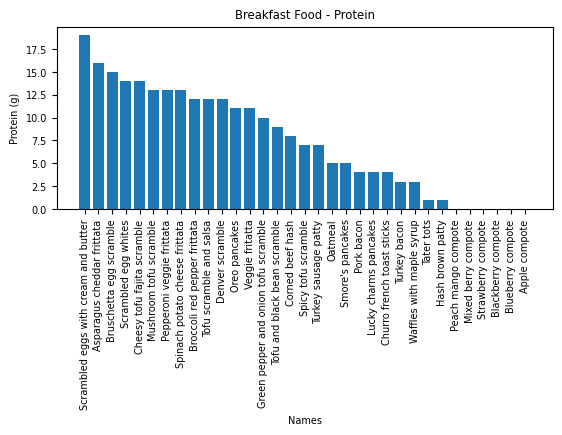

In [536]:
plt.subplots_adjust(bottom=0.5)
plt.rcParams["font.size"] = 7
plt.title("Breakfast Food - Protein")
plt.xlabel("Names")
plt.ylabel("Protein (g)")
proteinBreakfast_All = breakfast.sort_values("Protein (g)", ascending=False)
plt.bar(proteinBreakfast_All["Name"], proteinBreakfast_All["Protein (g)"])
plt.xticks(rotation = 90)
plt.show()

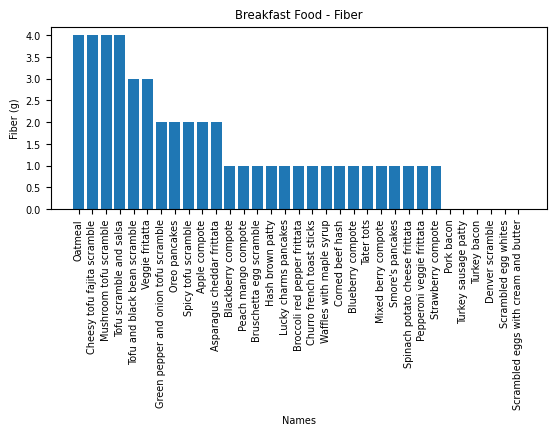

In [537]:
plt.subplots_adjust(bottom=0.5)
plt.rcParams["font.size"] = 7
plt.title("Breakfast Food - Fiber")
plt.xlabel("Names")
plt.ylabel("Fiber (g)")
fiberBreakfast_All = breakfast.sort_values("Fiber (g)", ascending=False)
plt.bar(fiberBreakfast_All["Name"], fiberBreakfast_All["Fiber (g)"])
plt.xticks(rotation = 90)
plt.show()

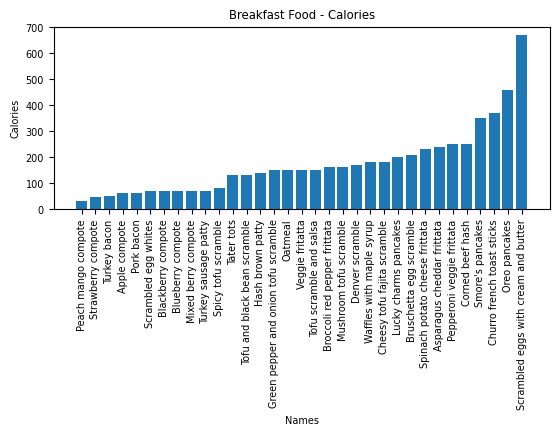

In [538]:
plt.subplots_adjust(bottom=0.5)
plt.rcParams["font.size"] = 7
plt.title("Breakfast Food - Calories")
plt.xlabel("Names")
plt.ylabel("Calories")
caloriesBreakfast_All = breakfast.sort_values("Calories", ascending=True)
plt.bar(caloriesBreakfast_All["Name"], caloriesBreakfast_All["Calories"])
plt.xticks(rotation = 90)
plt.show()

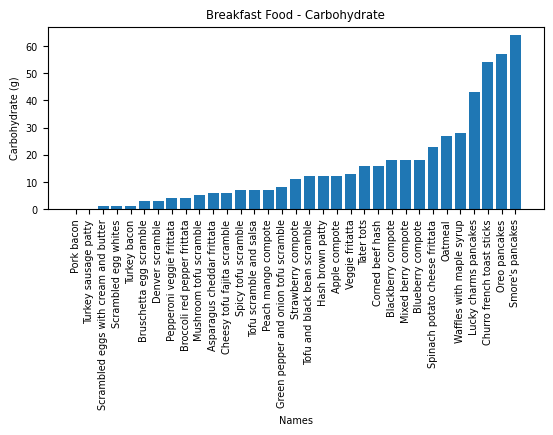

In [539]:
plt.subplots_adjust(bottom=0.5)
plt.rcParams["font.size"] = 7
plt.title("Breakfast Food - Carbohydrate")
plt.xlabel("Names")
plt.ylabel("Carbohydrate (g)")
carbBreakfast_All = breakfast.sort_values("Carbohydrate (g)", ascending=True)
plt.bar(carbBreakfast_All["Name"], carbBreakfast_All["Carbohydrate (g)"])
plt.xticks(rotation = 90)
plt.show()

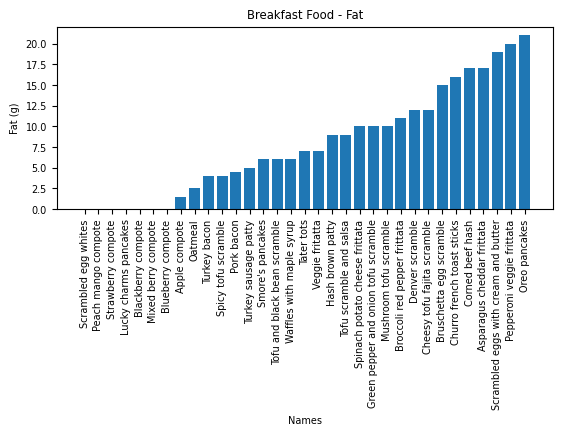

In [540]:
plt.subplots_adjust(bottom=0.5)
plt.rcParams["font.size"] = 7
plt.title("Breakfast Food - Fat")
plt.xlabel("Names")
plt.ylabel("Fat (g)")
fatBreakfast_All = breakfast.sort_values("Fat (g)", ascending=True)
plt.bar(fatBreakfast_All["Name"], fatBreakfast_All["Fat (g)"])
plt.xticks(rotation = 90)
plt.show()

### **Lunch/Dinner Breakdown**

Lunch and dinner are essential to a balanced diet, especially for college students who need sustained energy and mental focus throughout the day. These meals are prime opportunities to meet daily nutritional requirements, replenishing the body with proteins, complex carbohydrates, and essential vitamins to support brain function, physical energy, and overall wellness.<br>
We will focus on lunch/dinner food types to identify the best meal options to eat during lunch and dinner.

In [541]:
#We're going to perform the similiar process to how we broke down Breakfast foods.
lnd = df.loc[df["Type"]=="Lunch/Dinner"]
print(lnd) 
#Total of 302 different lunch/dinner options.

                                 Name  Calories  Fat (g) Cholesterol (mg)  \
60                  Blanched broccoli        25      0.0                0   
61                    Chicken pot pie       330     11.0               78   
62                          Beef stew       240     10.0               50   
63        Caramelized brussel sprouts        40      1.5                0   
64                   Chicken parmesan       510     21.0              188   
..                                ...       ...      ...              ...   
357               Chicken noodle soup       250      3.0               56   
358  Broccoli and cheddar cheese soup       220     17.0               41   
359          Tomato basil bisque soup       160      7.0               25   
360          Fresh herb croutons soup       110      6.0                0   
361               Cajun chicken penne       420     16.0               22   

     Sodium (mg)  Carbohydrate (g)  Fiber (g)  Protein (g)          Type  


In [542]:
#We're looking at top 10 Lunch/Dinner foods with the highest amount of protein and fiber.
#Also looking for top 10 Lunch/Dinner foods with the lowest amount of calories, carbohydrates, and fat.
proteinLND = lnd.sort_values("Protein (g)", ascending=False).head(10)
fiberLND = lnd.sort_values("Fiber (g)", ascending=False).head(10)
caloriesLND = lnd.sort_values("Calories", ascending=False).tail(10)
carbLND = lnd.sort_values("Carbohydrate (g)", ascending=False).tail(10)
fatLND = lnd.sort_values("Fat (g)", ascending=False).tail(10)

print(proteinLND.loc[:, ["Name", "Protein (g)"]])
print(fiberLND.loc[:, ["Name", "Fiber (g)"]])
print(caloriesLND.loc[:, ["Name", "Calories"]])
print(carbLND.loc[:, ["Name", "Carbohydrate (g)"]])
print(fatLND.loc[:, ["Name", "Fat (g)"]])

                                     Name  Protein (g)
64                       Chicken parmesan           51
302                   Fried chicken wings           46
166           Jumbo cheese stuffed shells           44
116                         Chicken korma           42
241                  Angry chicken po boy           42
249                Pesto chicken sandwich           40
259                Pork bacon beef burger           40
251                     Pizza beef burger           40
265  Philly roast pork with broccoli rabe           39
230                          Cajun burger           38
                        Name  Fiber (g)
187          Vegetable curry       18.0
270  Cajun black bean burger       14.0
330  Spicy black bean burger       13.0
78              Chana masala       11.0
114   Pineapple jerk chicken       10.0
328            Garden burger        9.0
181         Chickpea falafel        9.0
206                      Dal        9.0
185    African chickpea stew       

In [543]:
##The method we used for Breakfast will not work here, because there are so much more food options.
##The foods won't return a match if we simply sort by the ideal nutrient balances and look for similar names.
##Instead, we're creating a function that looks for the closest to ideal food options, with set specific threshold/conditions.
##We gave to make trade-offs to obtain foods higher in protein and lower in carbohydrate and calories - which in my opinion are more important.
def find_balanced_foods(lnd, high_protein_threshold=18, high_fiber_threshold=1, 
                        low_carb_threshold=4, low_fat_threshold=8, low_calories_threshold=200):
    high_protein_fiber = lnd[(lnd['Protein (g)'] >= high_protein_threshold) & 
                                         (lnd['Fiber (g)'] >= high_fiber_threshold)]
    
    low_carb_fat_calories = lnd[(lnd['Carbohydrate (g)'] <= low_carb_threshold) & 
                                             (lnd['Fat (g)'] <= low_fat_threshold) & 
                                             (lnd['Calories'] <= low_calories_threshold)]
    
    balanced_foods = high_protein_fiber[high_protein_fiber["Name"].isin(low_carb_fat_calories["Name"])]
    balanced_foods = balanced_foods[["Name", "Protein (g)", "Carbohydrate (g)", "Fiber (g)", "Fat (g)", "Calories"]]
    return balanced_foods
    
    #common_foods = pd.merge(high_protein_fiber, low_carb_fat_calories, on="Name")
    #return common_foods["Name"]

balanced_foods = find_balanced_foods(lnd)
print(balanced_foods.to_string(index=False))
##These are the top 3 lunch/dinner options that are found based on what I deemed as most "important" categories to look for.

                       Name  Protein (g)  Carbohydrate (g)  Fiber (g)  Fat (g)  Calories
herb roasted chicken breast           24                 4        1.0      3.0       160
        Jerk chicken thighs           26                 3        2.0      8.0       200
              Chicken tikka           18                 3        1.0      5.0       130


In [544]:
##But if we want to look for foods with higher fiber content, which would most likely be vegetables.
def find_balanced_foods2(lnd, high_protein_threshold=2, high_fiber_threshold=4, 
                        low_carb_threshold=10, low_fat_threshold=5, low_calories_threshold=100):
    high_protein_fiber = lnd[(lnd['Protein (g)'] >= high_protein_threshold) & 
                                         (lnd['Fiber (g)'] >= high_fiber_threshold)]
    
    low_carb_fat_calories = lnd[(lnd['Carbohydrate (g)'] <= low_carb_threshold) & 
                                             (lnd['Fat (g)'] <= low_fat_threshold) & 
                                             (lnd['Calories'] <= low_calories_threshold)]
    
    balanced_foods = high_protein_fiber[high_protein_fiber["Name"].isin(low_carb_fat_calories["Name"])]
    balanced_foods = balanced_foods[["Name", "Protein (g)", "Carbohydrate (g)", "Fiber (g)", "Fat (g)", "Calories"]]
    return balanced_foods

balanced_foods = find_balanced_foods2(lnd)
print(balanced_foods.to_string(index=False))
##These are the top 4 lunch/dinner vegetable options that are found based on higher fiber priority.

               Name  Protein (g)  Carbohydrate (g)  Fiber (g)  Fat (g)  Calories
   Roasted broccoli            4                 9        4.0      3.0        70
Roasted green beans            2                10        4.0      2.0        60
 Steamed broccolini            4                10        4.0      0.5        50
       Sauteed kale            4                 7        6.0      5.0        80


### **Lunch/Dinner Visualizations**

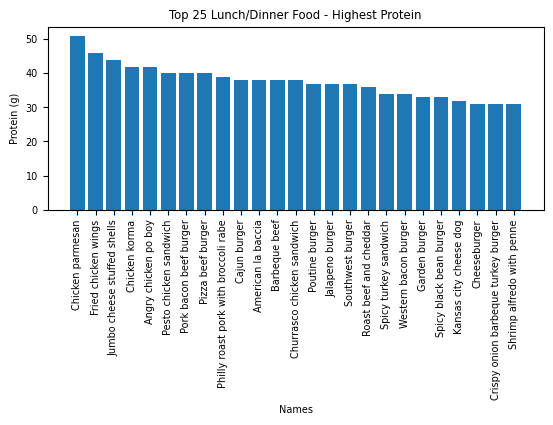

In [545]:
#Far too much items on lunch/dinner so we are just going to show top 25.
plt.subplots_adjust(bottom=0.5)
plt.rcParams["font.size"] = 7
plt.title("Top 25 Lunch/Dinner Food - Highest Protein")
plt.xlabel("Names")
plt.ylabel("Protein (g)")
proteinLND = lnd.sort_values("Protein (g)", ascending=False).head(25)
plt.bar(proteinLND["Name"], proteinLND["Protein (g)"])
plt.xticks(rotation = 90)
plt.show()

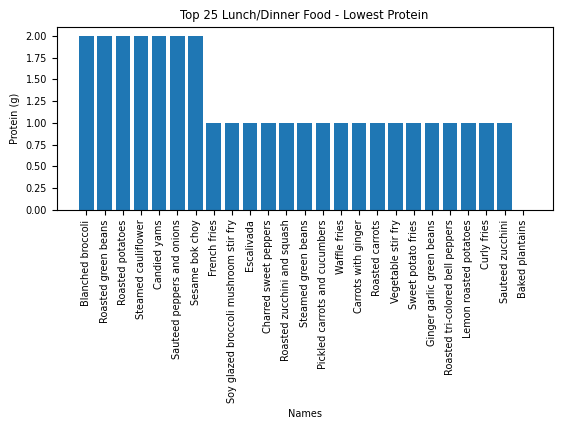

In [546]:
#Far too much items on lunch/dinner so we are just going to show top 25.
plt.subplots_adjust(bottom=0.5)
plt.rcParams["font.size"] = 7
plt.title("Top 25 Lunch/Dinner Food - Lowest Protein")
plt.xlabel("Names")
plt.ylabel("Protein (g)")
proteinLND = lnd.sort_values("Protein (g)", ascending=False).tail(25)
plt.bar(proteinLND["Name"], proteinLND["Protein (g)"])
plt.xticks(rotation = 90)
plt.show()

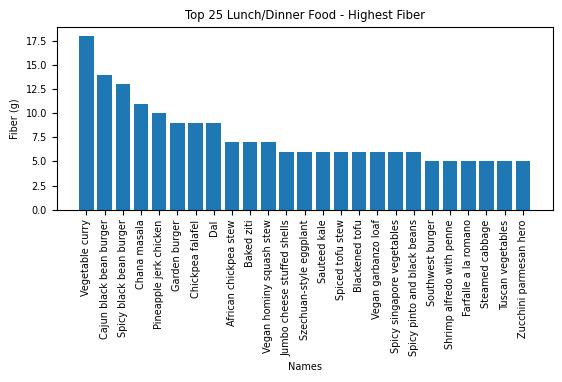

In [547]:
#Far too much items on lunch/dinner so we are just going to show top 25.
plt.subplots_adjust(bottom=0.5)
plt.rcParams["font.size"] = 7
plt.title("Top 25 Lunch/Dinner Food - Highest Fiber")
plt.xlabel("Names")
plt.ylabel("Fiber (g)")
fiberLND = lnd.sort_values("Fiber (g)", ascending=False).head(25)
plt.bar(fiberLND["Name"], fiberLND["Fiber (g)"])
plt.xticks(rotation = 90)
plt.show()

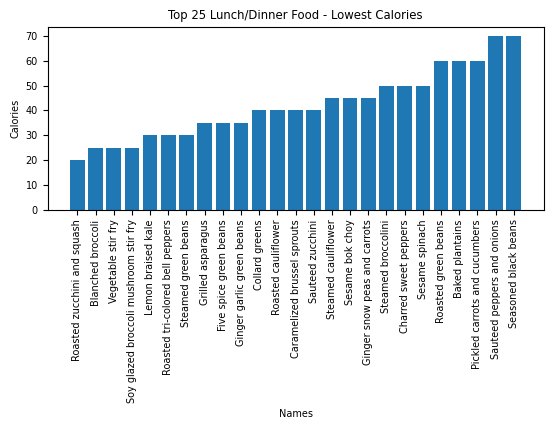

In [548]:
#Far too much items on lunch/dinner so we are just going to show top 25.
plt.subplots_adjust(bottom=0.5)
plt.rcParams["font.size"] = 7
plt.title("Top 25 Lunch/Dinner Food - Lowest Calories")
plt.xlabel("Names")
plt.ylabel("Calories")
caloriesLND = lnd.sort_values("Calories", ascending=True).head(25)
plt.bar(caloriesLND["Name"], caloriesLND["Calories"])
plt.xticks(rotation = 90)
plt.show()

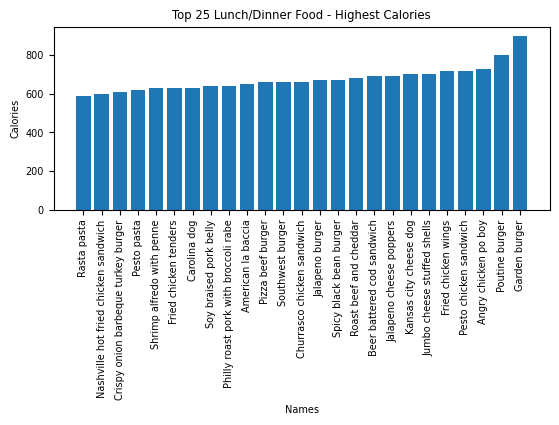

In [549]:
#Far too much items on lunch/dinner so we are just going to show top 25.
plt.subplots_adjust(bottom=0.5)
plt.rcParams["font.size"] = 7
plt.title("Top 25 Lunch/Dinner Food - Highest Calories")
plt.xlabel("Names")
plt.ylabel("Calories")
caloriesLND = lnd.sort_values("Calories", ascending=True).tail(25)
plt.bar(caloriesLND["Name"], caloriesLND["Calories"])
plt.xticks(rotation = 90)
plt.show()

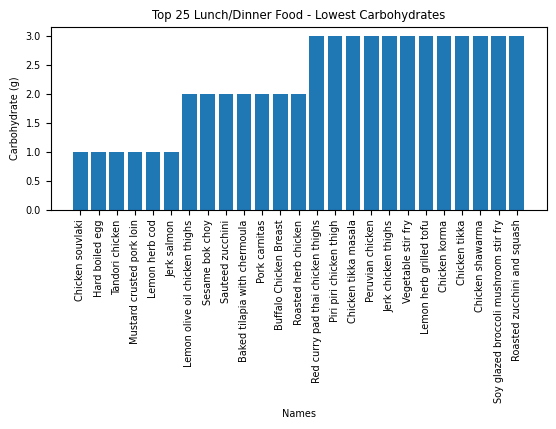

In [550]:
#Far too much items on lunch/dinner so we are just going to show top 25.
plt.subplots_adjust(bottom=0.5)
plt.rcParams["font.size"] = 7
plt.title("Top 25 Lunch/Dinner Food - Lowest Carbohydrates")
plt.xlabel("Names")
plt.ylabel("Carbohydrate (g)")
carbLND = lnd.sort_values("Carbohydrate (g)", ascending=True).head(25)
plt.bar(carbLND["Name"], carbLND["Carbohydrate (g)"])
plt.xticks(rotation = 90)
plt.show()

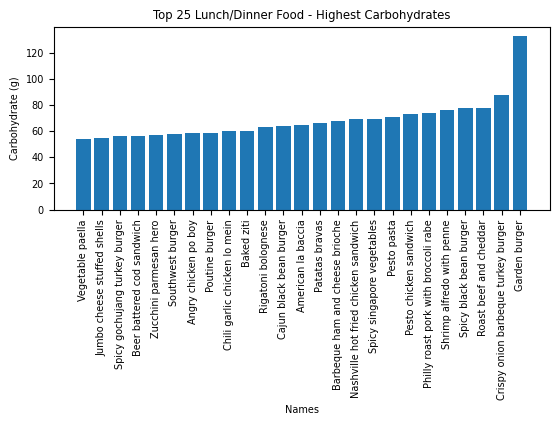

In [551]:
#Far too much items on lunch/dinner so we are just going to show top 25.
plt.subplots_adjust(bottom=0.5)
plt.rcParams["font.size"] = 7
plt.title("Top 25 Lunch/Dinner Food - Highest Carbohydrates")
plt.xlabel("Names")
plt.ylabel("Carbohydrate (g)")
carbLND = lnd.sort_values("Carbohydrate (g)", ascending=True).tail(25)
plt.bar(carbLND["Name"], carbLND["Carbohydrate (g)"])
plt.xticks(rotation = 90)
plt.show()

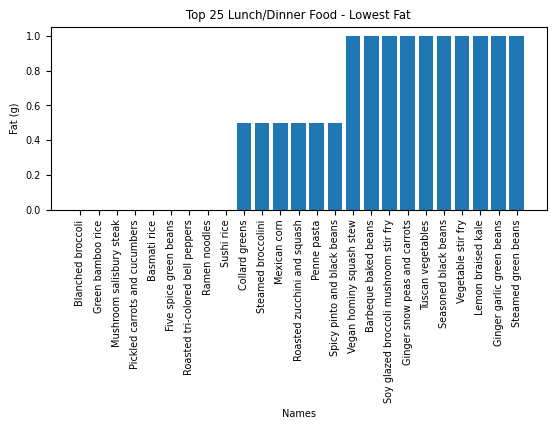

In [552]:
plt.subplots_adjust(bottom=0.5)
plt.rcParams["font.size"] = 7
plt.title("Top 25 Lunch/Dinner Food - Lowest Fat")
plt.xlabel("Names")
plt.ylabel("Fat (g)")
fatLND = lnd.sort_values("Fat (g)", ascending=True).head(25)
plt.bar(fatLND["Name"], fatLND["Fat (g)"])
plt.xticks(rotation = 90)
plt.show()

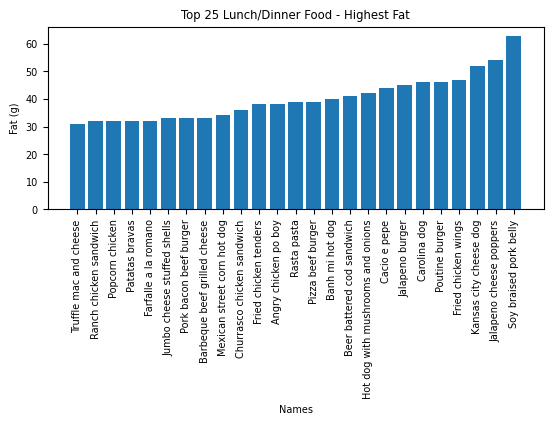

In [553]:
plt.subplots_adjust(bottom=0.5)
plt.rcParams["font.size"] = 7
plt.title("Top 25 Lunch/Dinner Food - Highest Fat")
plt.xlabel("Names")
plt.ylabel("Fat (g)")
fatLND = lnd.sort_values("Fat (g)", ascending=True).tail(25)
plt.bar(fatLND["Name"], fatLND["Fat (g)"])
plt.xticks(rotation = 90)
plt.show()

### **Dessert Breakdown**

Many students crave desserts as a sweet ending to a satisfying meal, offering comfort and indulgence. <br>
Since desserts are often high in sugar, carbohydrates, and calories, we aim to find options with lower carb and calorie content. <br>
We will focus on dessert options to identify the "healthiest" choices.

In [554]:
#We're going to perform the similiar process to how we broke down Breakfast & Lunch/Dinner foods.
dessert = df.loc[df["Type"]=="Dessert"]
print(dessert)
print("Number of rows:", len(dessert))
#Total of 27 different dessert options.

                           Name  Calories  Fat (g) Cholesterol (mg)  \
33   Cinnamon apple mini muffin       240     12.0               45   
34          Pumpkin mini muffin       250     13.0               45   
35        Cranberry mini muffin       290     13.0               45   
36   Chocolate chip mini muffin       310     16.0               45   
37           Banana mini muffin       250     12.0               45   
38             Corn mini muffin       240      9.0               35   
39           Carrot mini muffin       220      9.0               30   
40        Blueberry mini muffin       250     13.0               45   
41       Black and white cookie       230      7.0               20   
42        Chocolate chip cookie       180      9.0               15   
43        Oatmeal raisin cookie       170      7.0               17   
44              Frosted brownie       160      7.0               15   
45             Plain pound cake       450     25.0               80   
46    